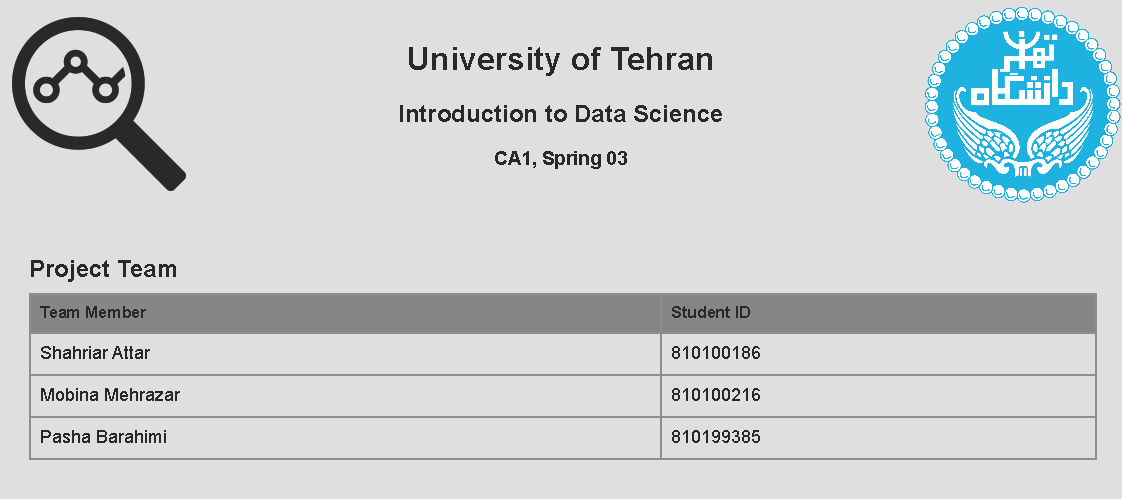


# Statistical Analysis Tools

## Table of Contents

-   [Statistical Analysis Tools](#statistical-analysis-tools)
    -   [Introduction](#introduction)
    -   [Objectives](#objectives)
    -   [Tasks](#tasks)
    -   [Environment Setup](environment-setup)
    -   [Monte Carlo Simulation](#monte-carlo-simulation)
        -   [Pi Calculation](#pi-calculation)
        -   [Mensch Game](#mensch-game)
    -   [Central Limit Theorem (CLT)](#central-limit-theorem)
    -   [Hypothesis Testing](#hypothesis-testing)
        -   [Unfair Coin](#unfair-coin)
        -   [T-Test](#t-test)
        -   [Job Placement](#job-placement)
    -   [Questions](#questions)
    -   [Resources](#resources)

## Introduction

In this assignment, we are going to get acquainted with and implement some tools for statistical analysis. These tools could come to out help in our future research and projects.

## Objectives

The purpose of this assignment is as follows:

1. Using `Monte Carlo Simulation` to model and analyze complex systems.
2. Using `Central Limit Theorem (CLT)` for making inferences about population parameters based on sample statistics.
3. Using `Hypothesis Testing` to make informed decisions and come to a conclusion about population parameters based on sample data.

## Tasks

1. **Monte Carlo Simulation**: Implementing `Monte Carlo Simulation` for the systems where analytical or closed-form solutions are difficult.
2. **Central Limit Theorem (CLT)**: Experiencing a hands-on opportunity to observe and understand the `Central Limit Theorem` in action.
3. **Hypothesis Testing**: Understanding how `Hypothesis Testing` can help us to analyze data and make a decision based on them in different situations.


## Environment Setup

Let's begin with setting up the Python environment and installing necessary libraries.


In [1]:
import warnings
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import random
from scipy import stats

In [6]:
JOB_PLACEMENT_CSV = "../data/job_placement.csv"

## Monte Carlo Simulation

In this section, we will learn more about Monte Carlo Simulation and understand how it can help us to model and analyze complex systems, where analytical or closed-form solutions are difficult.  
Monte Carlo simulation is a computational technique to approximate the behavior or output of a complex system or problem by repeated random sampling. This method relies on the Probability Theory concept of the Law of Large Numbers which states that if an experiment is repeated a large number of times then its average results will converge towards the expected value.

* Steps to perform Monte Carlo Simulation:
    1. Define the domain of possible inputs.
    2. Generate inputs randomly from a probability distribution over the domain.
    3. Perform a deterministic computation on the inputs.
    4. Aggregate the results.
   
* Advantages of Monte Carlo Simulation:
    - It can handle complex systems with multiple variables.
    - It can model systems with a large number of variables.
    - It can model systems with a large number of interactions between variables.
    - It can model systems with a large number of random variables.
    - It can model systems with a large number of possible outcomes.
    - It can model systems with a large number of possible states.

* Limitations of Monte Carlo Simulation:
    - It can be computationally expensive.
    - It can be time-consuming.
    - It can be memory-intensive.
    - It can be difficult to implement.
    - It can be difficult to validate.
    - It can be difficult to interpret.
    - It can be difficult to communicate.


### Pi Calculation

First, we are going to estimate the value of Pi using Monte Carlo simulation. The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points we can approximate the Pi number. Also, we'll repeat our simulation with a different number of points and analyze their results.


In [7]:
# Your code goes here

### Mensch Game

Mensch is a very old German game, which is also popular in our country. You can learn more about Mensch and its rules in [this link](https://en.wikipedia.org/wiki/Mensch_ärgere_Dich_nicht).

We are going to analyze the simpler version of this game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece. So, everything is purely based on chance. We want to calculate the probability of winning for each of the 1st, 2nd, 3rd, and 4th players in this game. Let's perform the Monte Carlo Simulation over the specified game to calculate these probabilities.


In [8]:
# Your code goes here

## Central Limit Theorem

The objective of this section is to provide us with a hands-on opportunity to observe and understand the Central Limit Theorem in action. The CLT is a fundamental result that supports many statistical techniques and methods. It provides a theoretical basis for making inferences about population parameters based on sample statistics.

First of all, we'll select three different probability distributions. These distributions will serve as the population distributions from which we will take out samples.


In [9]:
# Your code goes here

Now for each of the distributions, we will perform the following steps:


1. Generate a large number of random samples with a specific sample size from the chosen distribution.


In [10]:
# Your code goes here

2. Calculate the mean of each sample.


In [11]:
# Your code goes here

3. Plot the histogram of the sample means and overlay it with the expected normal distribution based on the Central Limit Theorem.


In [12]:
# Your code goes here

4. Repeat steps 1 to 3 for increasing sample sizes and observe how the distribution of sample means changes as we increase the sample size.


In [13]:
# Your code goes here

Now, let's document our observations and insights from each experiment, compare the distribution of sample means for each sample size and discuss how they align with the principles of the Central Limit Theorem.


## Hypothesis Testing

Hypothesis testing is an essential tool in statistics and scientific research that allows us to make informed decisions and come to a conclusion about population parameters based on sample data. In this section, we will understand how hypothesis testing can help us to analyze data and make a decision based on them in different situations.


### Unfair Coin

First, we need to simulate an unfair coin that is biased toward landing on one face more often than the other one (about 10% more probable). Our task will be to perform a hypothesis testing on this coin to determine whether it is fair or not. We'll use both confidence interval and p-value approach for our test.

Then, we will conduct these tests using different sample sizes: 30, 100, 1000, report and analyze the result of the hypothesis testing for different sample sizes, and calculate z-scores, p-values, the decision made regarding the null hypothesis, and the justification for the decision. Also, we'll discuss the impact of sample size on the hypothesis testing result.

- $H_0$ (Null Hypothesis): The coin is fair. (p = 0.5)  
- $H_A$ (Alternative Hypothesis): The coin is unfair. (p ≠ 0.5)

Then we will perform a two-tailed test, because we are testing for the possibility of the coin being biased towards either side.


In [ ]:
def p_value_test(coin_flips, significance_level, fair_coin_probability=0.5):
    t_stat, p_value = stats.ttest_1samp(coin_flips, fair_coin_probability)
    print(f"t_stat: {t_stat}, p_value: {p_value}")
    if p_value < significance_level:
        return True
    return False

In [ ]:
def confidence_interval_test(data, confidence=0.95):
    n = len(data)
    degrees_freedom = n - 1
    alpha = 1.0 - confidence
    sample_mean = np.mean(data)
    sample_standard_error = stats.sem(data, ddof=1)
    confidence_interval = stats.t.interval(confidence, degrees_freedom, sample_mean, sample_standard_error)
    
    print(f"Confidence Interval: {confidence_interval}")

In [14]:
prob_head = 0.55
num_flips = 1000
coin_flips = np.random.binomial(1, prob_head, num_flips)

In [16]:
confidence_level = 0.95
degrees_freedom = num_flips - 1
alpha = 1 - confidence_level
sample_mean = np.mean(coin_flips)
sample_std = stats.sem(coin_flips, ddof=1)
p_val = 0.05
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_std)

print(f"Confidence interval: {confidence_interval}")

if p_val < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Confidence interval: (0.5221320233539881, 0.583867976646012)
We reject the null hypothesis


### T-Test

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups or samples. In this test, we first calculate the t-statistic for the two groups or samples and then calculate the probability of having this **t-statistic** using the **t-distribution**. In the end, we only need to compare the p-value with our significance level($\alpha$) and make our decision. You can learn more about t-test, t-statistics, degrees of freedom, and student’s t-distribution in [this link](https://youtu.be/_L7uHhDY5AQ?si=iqg8NfRV9rMyYTD-).


In [17]:
# Your code goes here

### Job Placement

There is a common belief that working alongside studying has a negative impact on their grades. We are given a job placement dataset that contains information about students studying in USA various universities alongside their job status. We'll perform a hypothesis test to test whether this belief is true or not. In out test, we will suppose that variance is unknown but equal for both of these groups.

We will follow the below steps:


1. Split students into two groups based on their job placement status.


In [18]:
# Your code goes here

2. Calculate the t-statistic and degrees of freedom for these two groups. Do not use any library for implementing this part. Write the formula for each of these values in your report.


In [19]:
# Your code goes here

3. Now, determine the p-value for the calculated t-statistic and degrees of freedom with the help of t-distribution. You can use the SciPy library for this purpose.


In [20]:
# Your code goes here

4. Finally, report the result of your test and make your decision.


In [21]:
# Your code goes here

5. Repeat this test one more time. This time, only use the SciPy library for performing the test. Compare the results of the tests with each other.


In [22]:
# Your code goes here

## Questions

1. **Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?**

2. **How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?**

3. **How does increasing the sample size affect your coin test?**

4. **What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?**

5. **What are the preliminary conditions for using t-test on our data?**

6. **Read about some other types of tests that are used in scientific research. Write a line about each of them.**


## Resources
